In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Test with 50 samples

In [10]:
from weight_extractor import weight_extractor

df = pd.read_csv('files/一回目.csv', header = None)
filtered_df = df.iloc[1:, :5]



[ 0.00000e+00  7.00000e-03  1.10000e-02  2.80000e-02  3.00000e-02
  2.00000e-02 -2.00000e-03  1.60000e-02 -1.00000e-02  6.00000e-03
  2.80000e-02  2.50000e-02  2.90000e-02  2.10000e-02  8.00000e-03
 -2.00000e-03 -1.90000e-02  6.00000e-03  5.00000e-03  1.20000e-02
  4.00000e-03  0.00000e+00  4.10000e-02  4.60000e-02  6.20000e-02
  8.10000e-02  2.70000e-02  4.70000e-02 -1.60000e-02 -2.50000e-02
 -1.70000e-02 -7.00000e-03 -1.00000e-03  1.06000e-01  2.41000e-01
  2.37000e-01  2.35000e-01  2.28000e-01  2.41000e-01  2.48000e-01
  2.30000e-01  4.80000e-01  6.04000e-01  5.82000e-01  7.99000e-01
 -8.42500e+00 -1.21473e+02 -1.21236e+02  5.77000e-01  8.21000e-01]


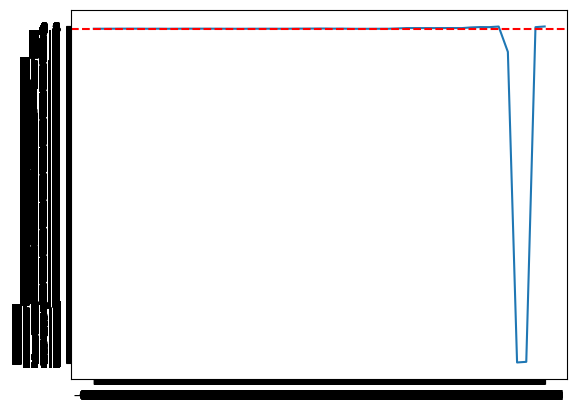

In [3]:
# filtered_50 = filtered_df.head(50)

# size = filtered_50.shape[0]
# w_50 = np.array([float(filtered_50.iloc[i, 4]) for i in range(size)])
# t_50 = np.array([i for i in range(w_50.size)])

# drawGraph(t_50, w_50)
filtered_50 = filtered_df.head(50)
w_50 = np.array([float(filtered_50.iloc[i, 4]) for i in range(filtered_50.shape[0])])
print(w_50)
we = weight_extractor(w_50)
# print(we.indexes.shape)
# print(we.weight_array.shape)
we.drawGraph(we.indexes, we.weight_array)

[ 6  8 15 16 28 29 30 31 32 45 46 47]


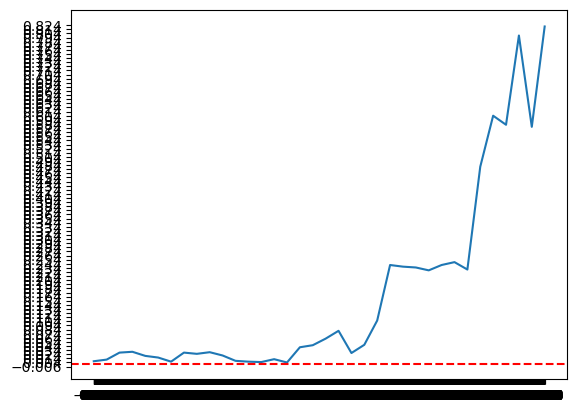

In [4]:
# w_50_revised = w_50[deleteShake(w_50)]
# print(w_50_revised.size)
# print(w_50_revised)
# t_50_revised = np.array([i for i in range(w_50_revised.size)])

we.deleteShake()
indexes = np.array([i for i in range(we.weight_array_filtered.size)])
we.drawGraph(indexes, we.weight_array_filtered)        

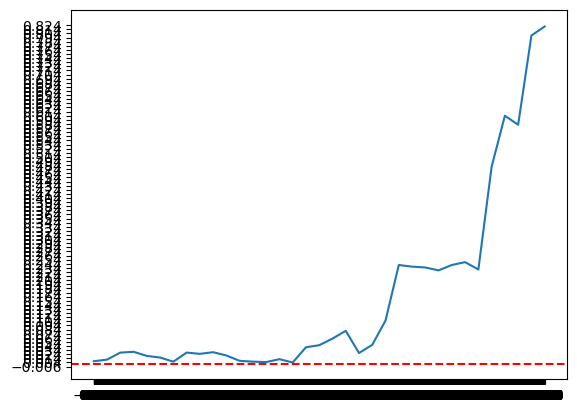

In [5]:
we.deltasCreator()
we.isDeltasOverThreshold()
we.extractedWeightWithoutShaking()
indexes = np.array([i for i in range(we.weight_array_filtered.size)])
we.drawGraph(indexes, we.weight_array_filtered)

In [6]:
print(we.shakeOrNot.size)
print(we.shakeOrNot)

50
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0.]


## Test with a whole sample

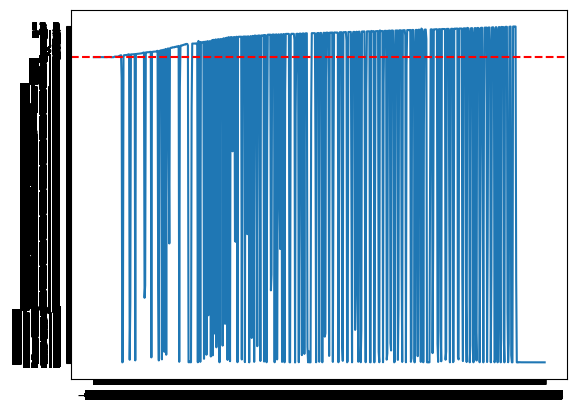

In [11]:
filtered_df = np.array([float(filtered_df.iloc[i, 4]) for i in range(filtered_df.shape[0])]) 

we2 = weight_extractor(filtered_df)
we2.drawGraph(we2.indexes, we2.weight_array)

[  6   8  15  16  28  29  30  31  32  45  46  47  58  59  67  82  83  93
 104 105 110 114 117 121 122 138 139 153 154 155 156 157 158 168 172 178
 182 185 186 189 192 195 196 198 199 203 207 208 211 212 216 219 220 224
 225 228 229 232 239 244 247 248 251 254 255 259 263 264 268 269 275 279
 280 286 287 292 293 296 297 300 301 304 305 308 309 316 317 325 326 330
 331 335 336 340 341 345 346 347 348 349 350 351 358 359 364 369 373 374
 379 380 386 387 395 396 401 402 409 410 416 417 422 423 426 427 431 432
 438 439 440 446 447 453 454 460 461 467 468 473 474 479 480 485 486 491
 492 497 498 504 505 512 513 517 518 519 522 523 527 528 532 533 538 539
 540 541 542 543 547 548 555 556 560 561 568 569 574 575 580 581 588 589
 595 596 601 602 607 608 612 613 617 618 623 624 628 629 630 635 636 641
 642 647 648 652 653 656 657 662 663 668 669 670 674 675 676 682 683 684
 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702
 703 704 705 706 707 708 709 710 711 712 713 714 71

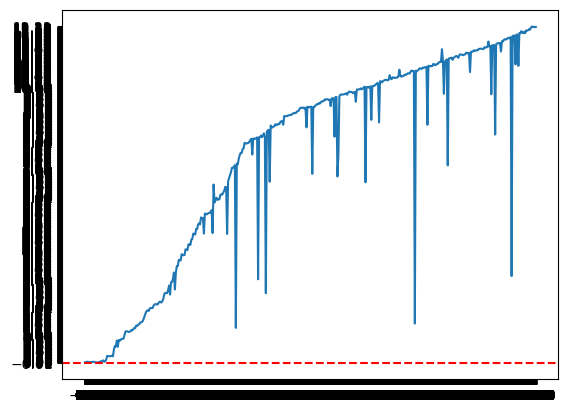

In [12]:
we2.deleteShake()
indexes = np.array([i for i in range(we2.weight_array_filtered.size)])
we2.drawGraph(indexes, we2.weight_array_filtered)      

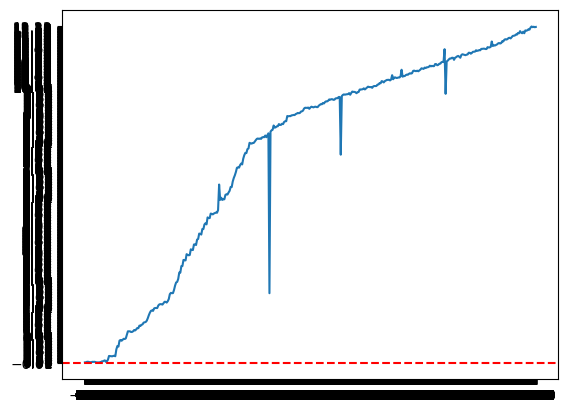

In [13]:
we2.deltasCreator()
we2.isDeltasOverThreshold()
we2.extractedWeightWithoutShaking()
indexes = np.array([i for i in range(we2.weight_array_filtered.size)])
we2.drawGraph(indexes, we2.weight_array_filtered)

In [14]:
print(we2.shakeOrNot.size)
print(we2.shakeOrNot)

729
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0

In [17]:
print("minimum: ", min(we2.deltas))
print("maximum:", max(we2.deltas))
print(we2.deltas)

minimum:  -5.8149999999999995
maximum: 5.873000000000001
[ 4.000e-03  1.700e-02  2.000e-03 -1.000e-02 -4.000e-03 -1.000e-02
  2.200e-02 -3.000e-03  4.000e-03 -8.000e-03 -1.300e-02 -2.000e-03
 -1.000e-03  7.000e-03 -8.000e-03  3.700e-02  5.000e-03  1.600e-02
  1.900e-02 -5.400e-02  2.000e-02  5.900e-02  1.350e-01 -4.000e-03
 -2.000e-03 -7.000e-03  1.300e-02  7.000e-03 -1.800e-02  2.500e-01
  1.240e-01 -2.200e-02  2.170e-01  2.200e-02 -2.700e-02  3.700e-02
  3.400e-02 -8.000e-03  2.200e-02  1.250e-01  1.330e-01  1.000e-03
 -2.000e-03 -2.400e-02  3.000e-03  2.400e-02  4.500e-02 -1.400e-02
  4.100e-02  4.700e-02 -7.000e-03  9.400e-02 -1.100e-02  4.000e-02
  1.600e-02  6.300e-02  1.400e-02  1.000e-02  4.600e-02  9.300e-02
  1.100e-01  9.100e-02  6.500e-02  1.700e-02 -1.900e-02  9.000e-02
  1.500e-02  1.000e-03 -2.000e-03  9.100e-02  4.100e-02  1.000e-02
 -5.000e-03 -1.100e-02  4.900e-02  5.200e-02 -2.000e-03 -2.700e-02
  4.900e-02  8.000e-02  1.770e-01  4.700e-02 -1.100e-02  3.000e-03
  1.1